<a href="https://colab.research.google.com/github/Nildk123/Deeplearning/blob/master/week1/Copy_of_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


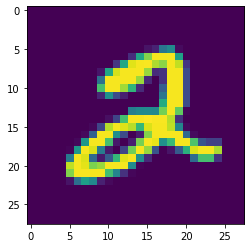

In [6]:
plt.imshow(X_train[5])

(60000, 28, 28)


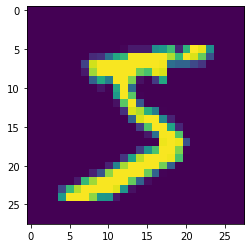

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64, 1, activation='relu'))
model.add(Convolution2D(32, 3,3, activation='relu'))
model.add(Convolution2D(10, 9))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.


In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        8256      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 32)          18464     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 1, 1, 10)         

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [26]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=20, verbose=1)

Epoch 1/20
  384/60000 [..............................] - ETA: 21s - loss: 0.0022 - acc: 1.0000    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 16s 272us/step - loss: 0.0019 - acc: 0.9995
Epoch 2/20
60000/60000 [==============================] - 16s 271us/step - loss: 4.7913e-04 - acc: 1.0000
Epoch 3/20
60000/60000 [==============================] - 16s 272us/step - loss: 3.2078e-04 - acc: 1.0000
Epoch 4/20
60000/60000 [==============================] - 16s 272us/step - loss: 2.9899e-04 - acc: 1.0000
Epoch 5/20
60000/60000 [==============================] - 16s 271us/step - loss: 2.8816e-04 - acc: 1.0000
Epoch 6/20
60000/60000 [==============================] - 16s 273us/step - loss: 2.8189e-04 - acc: 1.0000
Epoch 7/20
60000/60000 [==============================] - 16s 272us/step - loss: 2.7796e-04 - acc: 1.0000
Epoch 8/20
60000/60000 [==============================] - 16s 271us/step - loss: 2.7539e-04 - acc: 1.0000
Epoch 9/20
60000/60000 [==============================] - 16s 271us/step - loss: 2.7349e-04 - acc: 1.0000
Epoch 10/20
60000/60000 [==============================] - 16

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [28]:
print(score)

[0.06323076968669322, 0.9926]


In [166]:
print(score)

[0.039109805249668124, 0.9914]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[1.30351205e-19 6.36326729e-19 2.05484542e-13 2.98224223e-09
  1.59665235e-18 1.59245093e-16 2.64086749e-30 1.00000000e+00
  3.77824464e-12 1.35816414e-10]
 [1.22241529e-12 6.50454733e-12 9.99998569e-01 3.82747219e-13
  1.41443745e-22 6.78445405e-14 1.44989576e-06 4.97151060e-23
  1.73057443e-10 1.42901390e-17]
 [9.24936447e-11 9.99985456e-01 9.65103766e-08 1.80667356e-10
  1.40496395e-05 2.31756246e-11 4.94618679e-10 4.71380588e-08
  3.50482253e-07 8.93273719e-11]
 [1.00000000e+00 2.56636714e-19 2.36132728e-12 2.10576113e-18
  1.21698813e-18 9.91768093e-15 4.58454519e-09 1.73590114e-12
  2.30815909e-12 2.72909543e-13]
 [5.59905637e-13 1.83906900e-17 1.87698334e-14 1.77179376e-12
  1.00000000e+00 4.97642067e-20 4.19006531e-15 6.83223226e-12
  1.23062609e-08 3.97500344e-08]
 [1.22201164e-11 9.99992132e-01 4.22991947e-10 1.47528760e-11
  1.50812377e-06 3.39260921e-15 1.67255782e-12 6.38818210e-06
  4.18179944e-08 1.41679682e-10]
 [7.87876696e-17 4.29389224e-14 8.84756624e-09 1.03402943e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [108]:
layer_dict

{'activation_13': <keras.layers.core.Activation at 0x7fa3187ec048>,
 'conv2d_46': <keras.layers.convolutional.Conv2D at 0x7fa3187aa9e8>,
 'conv2d_47': <keras.layers.convolutional.Conv2D at 0x7fa3187aa9b0>,
 'conv2d_48': <keras.layers.convolutional.Conv2D at 0x7fa3187aacc0>,
 'conv2d_49': <keras.layers.convolutional.Conv2D at 0x7fa318cc07b8>,
 'conv2d_50': <keras.layers.convolutional.Conv2D at 0x7fa318cc4a90>,
 'flatten_13': <keras.layers.core.Flatten at 0x7fa318cc9be0>,
 'max_pooling2d_11': <keras.layers.pooling.MaxPooling2D at 0x7fa318cbc550>}

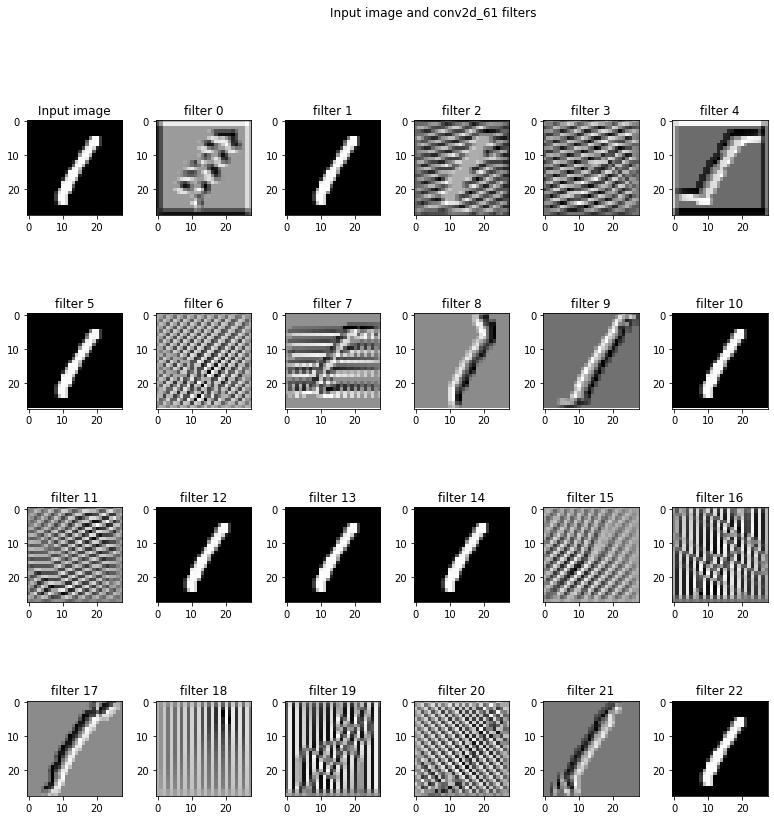

In [138]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[3]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_61'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()